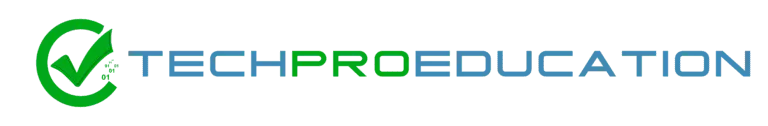

In [ ]:
#bu notebook't ilk önce NLP de kullanilacak islemlerden biraz bahsedildi
# cümle temizleme icin cleaning ve cleaning_fs diye bir fonksiyon yazililmis onlarla textleri sade hale getiriyorlar
# ve lemmatization ve stemming islemleri yapildi
# ve bazi baska alt islemlerde var

#sonrasinda twetter datasi alip bunlari isleme sokuyoruz
# 1- önce datayi okudu ve target ve featureseri sectik, sentimen target, textler ise features oldu
# 2- cleaning ile texti temizledi karekterler ve virgüller falan varsa temzledi
# 3- sonra train test spöit islemlerine hazirik yapiyoruz
# 4- X = DF2['text], y = df2['airline_sentiment'] diye atama yapti, X features ,y ise target sütunumuz
# 5- Train test split ile datayi böldük

#6- istersen count vectorizationile veya TF-IDF ile her kelimenin cümle icinde agirlilarini DataFrame olarak gösterebilirsin
# bu iki islem ayni anda olmaz, ama TF-IDF biraz daha agirlik ve kelimenin hem cümle icindeki, hemde bütün cümlelerdeki 
# bulunma olasiliginida kattigi icin daha ilgili sonclar  veriyor galiba 
# ve note book bitiyor. aslinda notebook 2 de daha detayli ve gercek islemler var


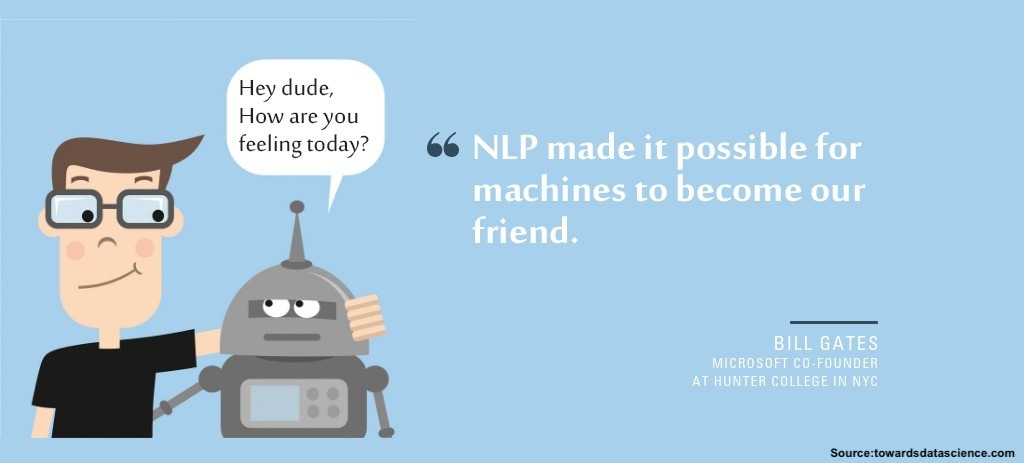

# Data Cleaning and Vectorization For NLP

## Install and Import

In [73]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)  #columns sayisi 50 olsun diyoruz

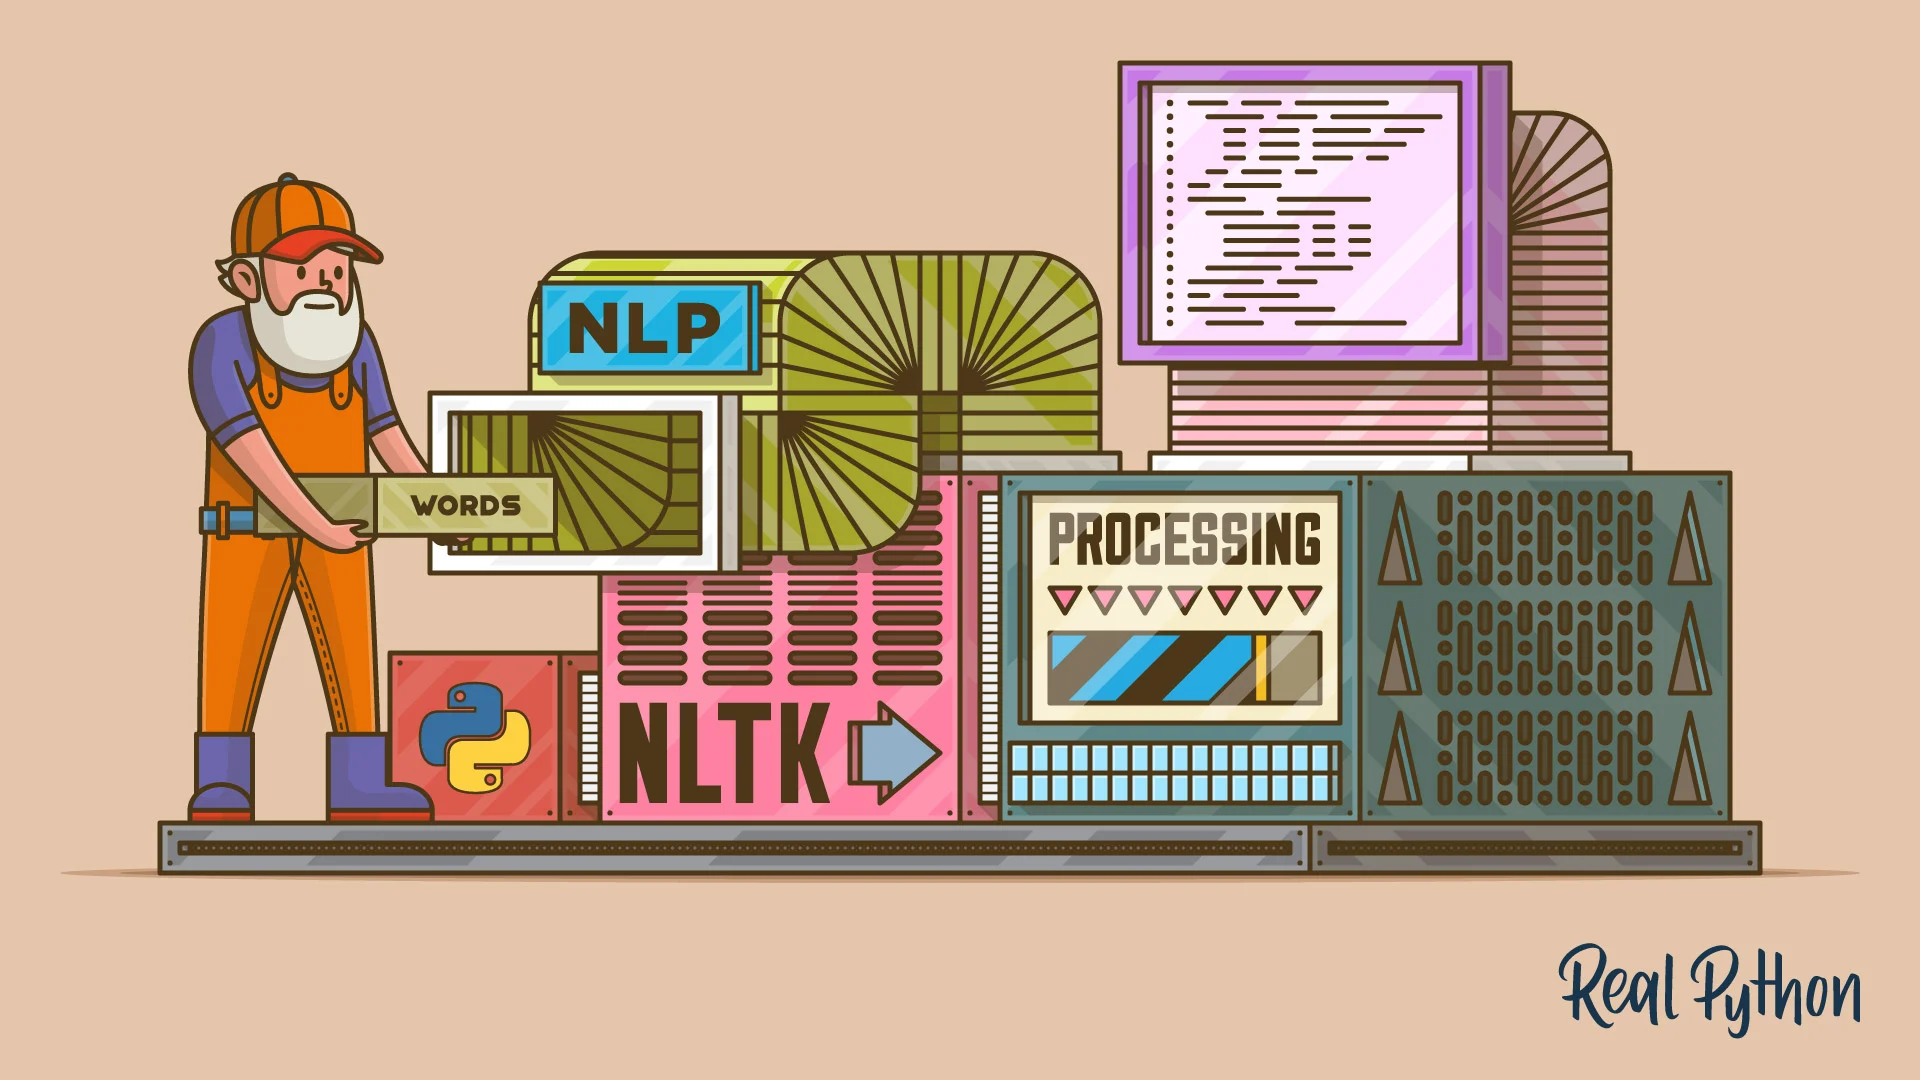

In [74]:
#!pip install nltk  #en-el-ti-key

## Tokenization

In [75]:
import nltk

In [76]:
sample_text= "Awesome!!!, This is fantastic!!!. We are very pleased...3456"

In [77]:
from nltk.tokenize import sent_tokenize, word_tokenize 
#sentencein cok fazla kullaniliyor

In [78]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/veyselaytekin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
sentence_token = sent_tokenize(sample_text.lower()) # ilk önce büyük harfleri küçültülür, cümle cümle tekonize edilir
sentence_token

#burda hepsini kücük harflaere ceviriyoruz, BOOK ile book ayni sey oldugunu göstermek icin

['awesome!!', '!, this is fantastic!!!.', 'we are very pleased...3456']

In [80]:
type(sentence_token)

list

In [81]:
word_token = word_tokenize(sample_text.lower()) # kelime kelime tokenize yapılı
word_token
#burda ünlem ve nokta isaretlerini kaldiriyorum

['awesome',
 '!',
 '!',
 '!',
 ',',
 'this',
 'is',
 'fantastic',
 '!',
 '!',
 '!',
 '.',
 'we',
 'are',
 'very',
 'pleased',
 '...',
 '3456']

## Removing Punctuation and Numbers

In [82]:
tokens_without_punc = [w for w in word_token if w.isalpha()]  # .isalnum() for number and object
tokens_without_punc  # noktalama özel karekter ve sayilar silinir. ,eğer sayılar kalması istenirse isalnum() kullanılır

#text'deki tüm karakterler alfabetikse ve text'de en az bir karakter varsa True, aksi halde False döndürün.bir tane bosluk, veya sayi varsa,False döndürür

['awesome', 'this', 'is', 'fantastic', 'we', 'are', 'very', 'pleased']

In [83]:
tokens_without_punc = [w for w in word_token if w.isalnum()] # .isalnum() for number and object
tokens_without_punc  # noktalama özel karekter  silinir. ,eğer sayılar kalması istenirse isalnum() kullanılır

# eger kelimeler ve sayilarida almak istersek isalnum kullaniyoruz,bosluk veya noktalama @ isretleri varsa False verir sayi ve harf olmali

#alpha numeric kisaltmasi

['awesome', 'this', 'is', 'fantastic', 'we', 'are', 'very', 'pleased', '3456']

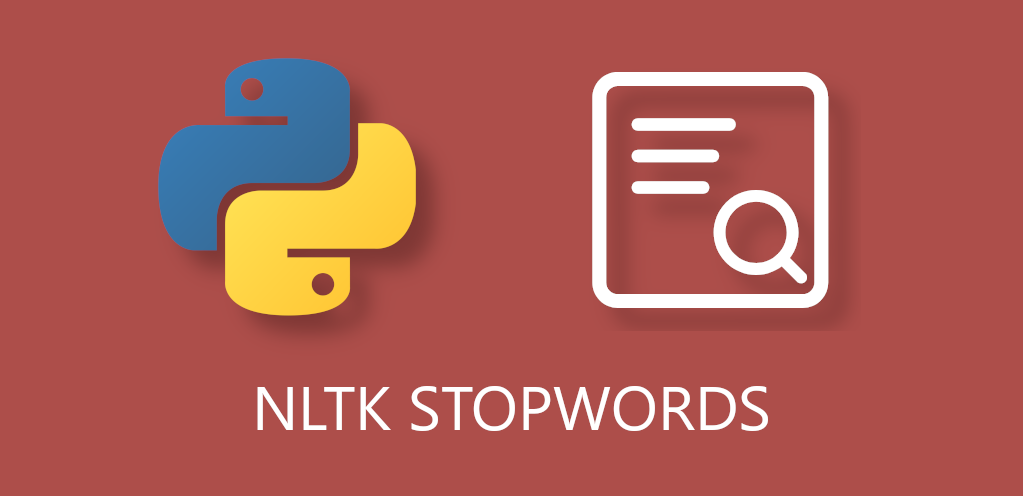

## Removing Stopwords

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/veyselaytekin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
from nltk.corpus import stopwords

In [86]:
stop_words = stopwords.words("english") #stopwords lerde temizlenir
stop_words

# hangi dili istiyorsak yaziyoruz,doesn't isn't gibi modifiye etmemiz gereken durmlar,eger sentiment analizde bunlari kaldirmamamiz gerekiyor
#yoksa anlayamayiz

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [87]:
stopwords.words ('turkish')

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [88]:
#stop_words = stopwords.words("Turkish") #stopwords türkce cümledelerde temizlenir
#stop_words

In [89]:
tokens_without_punc # cümlelerin temizlenmiş son hali 

['awesome', 'this', 'is', 'fantastic', 'we', 'are', 'very', 'pleased', '3456']

In [90]:
token_without_sw = [t for t in tokens_without_punc if t not in stop_words] # if you make a sentiment analysis , you can't remove 
                                                                           # negative auxiliary verb
token_without_sw
#cümle analizi yapılacak ise olumsuzluk fiil yardımcı fiiller silinmez
# burda stop word iicnde olmayan kelimeleri atama yaptik ve 4 kelime kaldi

['awesome', 'fantastic', 'pleased', '3456']

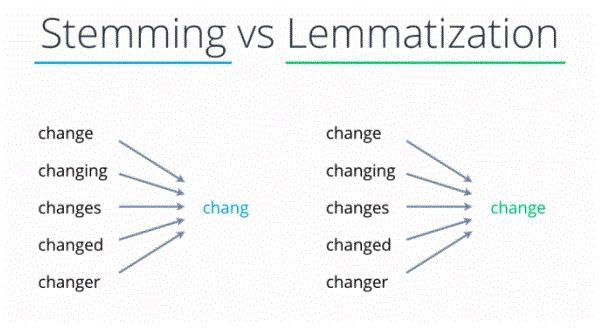

## Data Normalization-Lemmatization

In [91]:
import nltk

In [92]:
from nltk.stem import WordNetLemmatizer

In [93]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/veyselaytekin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/veyselaytekin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [95]:
WordNetLemmatizer().lemmatize("children")
#sözlüge bakarak ordaki en alt yapiya bakiyordu,bunu test ediyoruz

'child'

In [96]:
WordNetLemmatizer().lemmatize("runs", pos='n')  #'v' olduğu zaman verb olduğunu hatırlatıyoruz.
#sözlükten run oldugunu buluyor
# pos= position noun isim halinde ,eger verb ler daha önemliyse v yaz ama yazmasan kendi default olarak bulucak

#running yazip pos='n' yazinca running olarak vermis demmeki isim halile almis
#

'run'

In [97]:
lem =[WordNetLemmatizer().lemmatize(t) for t in token_without_sw]  #token_without_sw bizim bir yukarida stop_wordslari attiktan sonra kalanlar

In [98]:
lem
#burda pos=kendi default olarak belirliyor

['awesome', 'fantastic', 'pleased', '3456']

In [99]:
lem = [WordNetLemmatizer().lemmatize(t,pos = 'v') for t in token_without_sw]
lem

#burda pos ='v' yaptigimiz icin fiilin kök halini aldi please aldi

['awesome', 'fantastic', 'please', '3456']

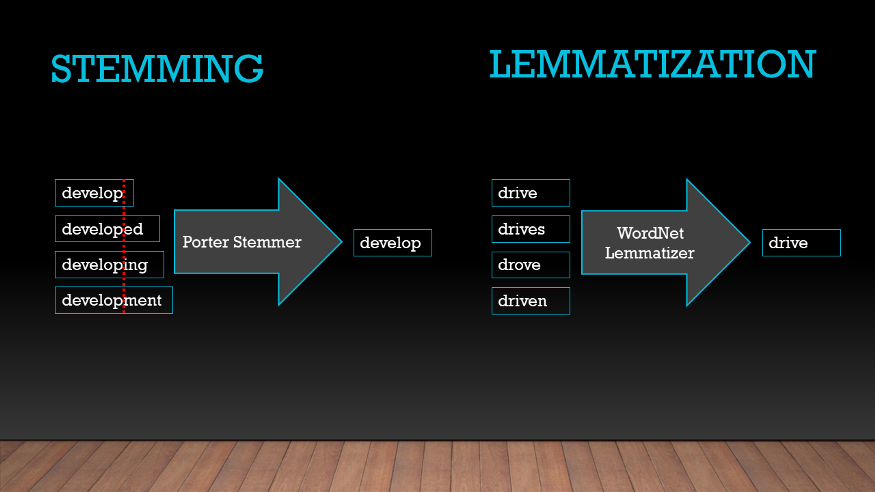

## Data Normalization-Stemming

In [100]:
from nltk.stem import PorterStemmer

In [101]:
PorterStemmer().stem("development")
#buna bakalim dedik, stemm biraz kötü yerden kesti, development kalsa daha anlamli olacakti

'develop'

In [102]:
PorterStemmer().stem('studies')
#güzel yerden kesmedi

'studi'

In [89]:
stem = [PorterStemmer().stem(t) for t in token_without_sw]

In [90]:
stem
#burda da stemming anlazsizlik olusturdu

['awesom', 'fantast', 'pleas', '3456']

## Joining

In [91]:
" ".join(lem)
#burda yukarda´kileri bosluga join ettik

'awesome fantastic pleased 3456'

## Cleaning Function - for classification (NOT for sentiment analysis)

In [92]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()] #noktalamalari siliyor
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words] #stop_word'leri siliyor
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [93]:
pd.Series(sample_text).apply(cleaning)

#ykarda text cleaning islemleri yapiyor

0    awesome fantastic pleased
dtype: object

## Cleaning Function - for sentiment analysis

In [96]:
sample_text= "Awesome!!!, This is fantastic!!!. We are very pleased...3456. don't eat, isn't. no problem for me"

In [97]:
s = sample_text.replace("'",'')
word = word_tokenize(s)
word 

['Awesome',
 '!',
 '!',
 '!',
 ',',
 'This',
 'is',
 'fantastic',
 '!',
 '!',
 '!',
 '.',
 'We',
 'are',
 'very',
 'pleased',
 '...',
 '3456.',
 'dont',
 'eat',
 ',',
 'isnt',
 '.',
 'no',
 'problem',
 'for',
 'me']

In [98]:
# Removing Stopwords
for i in ["not", "no"]:    #yardimci fiileri kaldirmak istemiyoruz, onlara eklenen no,not larin kalmasini istiyoruz
    stop_words.remove(i)

def cleaning_fsa(data):
    
    
    #1. removing upper brackets to keep negative auxiliary verbs in text
    #yardimci fiilleri metinde tutmak icin tirnak isaretini kaldirmak
    text = data.replace("'",'')
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  #noktalama isaretlerini siliyor
    
    
        
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [99]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
pd.Series(sample_text).apply(cleaning_fsa)

#awesome fantastic pleased  cleaning functiondan cikan ciktilar

0    awesome fantastic pleased dont eat isnt no pro...
dtype: object

## CountVectorization and TF-IDF Vectorization

In [102]:
df = pd.read_csv("airline_tweets.csv")

In [103]:
df.head()
#bize target ve featuresler lazim, genel olarak twet datalarinda targer posotiv negatif ve nötr olabili
#ve bunlarin labellama yapilmasi gerekir, 
#bu datalari alip model gelistireceksin, ve yeni yazilan texti olumlu mu olumsuz mu onu buldurmaya calisacak
#sirkette negatifleri hemen bulup pnlara yapilmasi gerekenleri bulacagiz
#airline sentiment target sirket bunu labellama yapiyor

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [112]:
df = df[['airline_sentiment','text']]
df

#burda iki sütun aldik,texti temizlemek gerekiyor

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...


In [113]:
df.head(8)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...


In [114]:
df2 = df.copy()

In [115]:
df2["text"] = df2["text"].apply(cleaning)
#yukardaki  fonksiyo ile temizliyoruz
#

In [116]:
df2

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing
5,negative,virginamerica seriously would pay flight seat ...
6,positive,virginamerica yes nearly every time fly vx ear...
7,neutral,virginamerica really missed prime opportunity ...


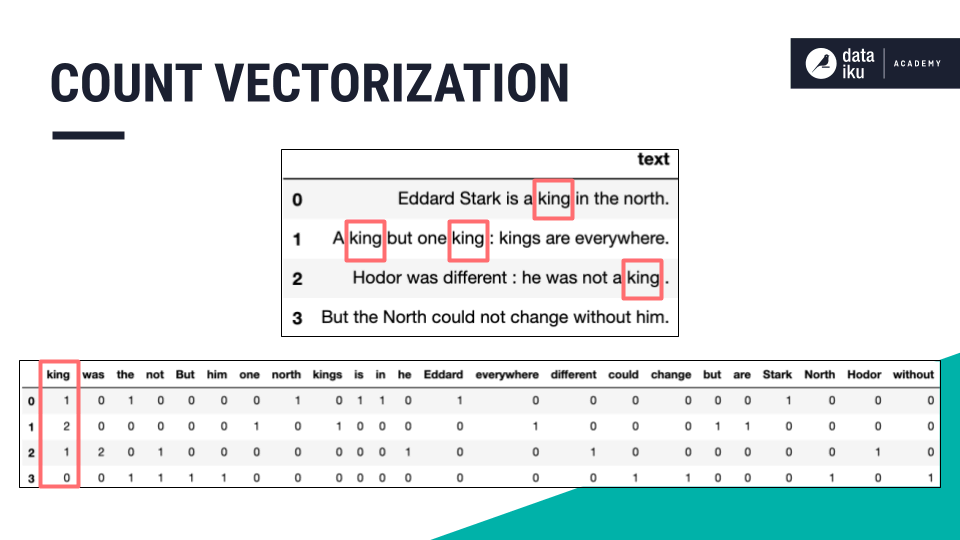

## CountVectorization

In [117]:
X = df2["text"]
y = df2["airline_sentiment"]

In [ ]:
#conunt vectörization ve TFisf var

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 42)
#dengeli almasi icin stratify aliyoruz

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
#asagidada TF idf kullancak

In [124]:
vectorizer = CountVectorizer()   #bu fonksiyonu aliyoruz
X_train_count = vectorizer.fit_transform(X_train)   # fit deyince bütün unique leri tespit ediyor, transform da ise sayıyor
X_test_count = vectorizer.transform(X_test)     # X testte olan kelime X train de yok ise değerlendirilmeye alınmaz.
# O yüzden büyük Corpus ta eğitimesi gerekir ki iyi sonuçlar alalım...
# X test te elma var , ama trainde yoksa degerlendirmeye alinmayacak, bu yüzden train cok güclü olursa daha iyi olur
# scaleingte 0ile 1 arasina sikistiriyordu ML de ,burda ise get_dummies gibi bisey apiyor

In [125]:
vectorizer.get_feature_names()     # bütün unique tokenları verir.    # bu kodda problem yaşayanlar "vectorizer.get_feature_names_out()" 
#unique degerleri aliyourz

['another',
 'away',
 'bad',
 'big',
 'dhepburn',
 'ear',
 'every',
 'fly',
 'go',
 'mean',
 'must',
 'nearly',
 'need',
 'really',
 'said',
 'take',
 'thing',
 'time',
 'today',
 'trip',
 'virginamerica',
 'vx',
 'worm',
 'yes']

In [126]:
X_train_count.toarray()   

array([[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0]], dtype=int64)

In [127]:
df_count = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())
df_count

,another,away,bad,big,dhepburn,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [128]:
X_train

6    virginamerica yes nearly every time fly vx ear...
0                          virginamerica dhepburn said
2    virginamerica today must mean need take anothe...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [129]:
X_train[6]

#bazilarinda bu hata aliyor demekki bu 6ci indis test datasina gitmis olabilir

'virginamerica yes nearly every time fly vx ear worm go away'

In [130]:
vectorizer.vocabulary_

{'virginamerica': 20,
 'yes': 23,
 'nearly': 11,
 'every': 6,
 'time': 17,
 'fly': 7,
 'vx': 21,
 'ear': 5,
 'worm': 22,
 'go': 8,
 'away': 1,
 'dhepburn': 4,
 'said': 14,
 'today': 18,
 'must': 10,
 'mean': 9,
 'need': 12,
 'take': 15,
 'another': 0,
 'trip': 19,
 'really': 13,
 'big': 3,
 'bad': 2,
 'thing': 16}

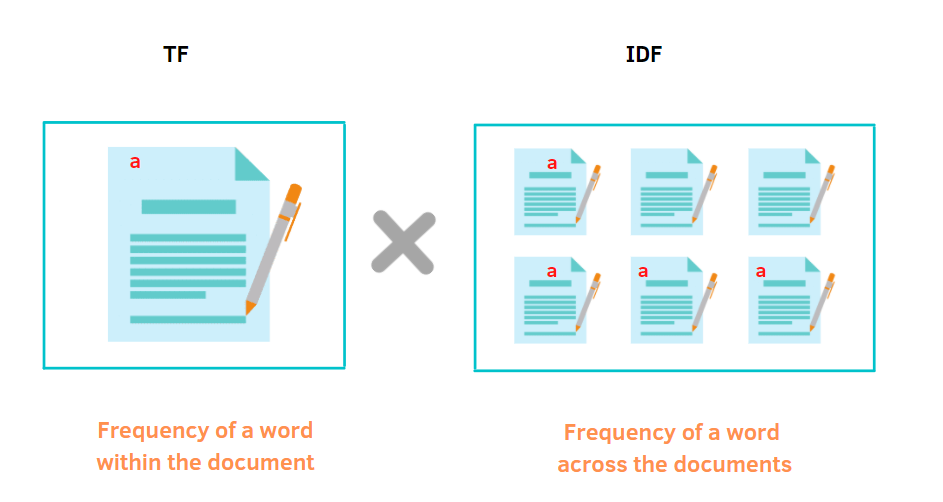

## TF-IDF

In [ ]:
# count vectörize , ile TF ITF bu islemler birbirinin alternatif ikisi ayni anda yapilmaz

In [ ]:
#hem kendi satir icindeki durumunu hemde corpus icindeki degerlerineide hesaba katiyor onun icin bu biraz daha etkili

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)   # fit dediğimiz zaman önce her satırda geçip geçmediğini sonra her document da geçenlerin sayısını tespit ediyor. 
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)     # TF IDF formülünü uyguluyor

#count vectorization ile benzer yazilimi var,
#TF IDF formülünü uyguluyor

In [140]:
tf_idf_vectorizer.get_feature_names()

['another',
 'away',
 'bad',
 'big',
 'dhepburn',
 'ear',
 'every',
 'fly',
 'go',
 'mean',
 'must',
 'nearly',
 'need',
 'really',
 'said',
 'take',
 'thing',
 'time',
 'today',
 'trip',
 'virginamerica',
 'vx',
 'worm',
 'yes']

In [141]:
X_train_tf_idf.toarray()
#digerinde interger degerler varken, burda formülden ciktigi icin virgüllü sayilar cikiyor
#agirliklari diyebiliriz

array([[0.        , 0.31200802, 0.        , 0.        , 0.        ,
        0.31200802, 0.31200802, 0.31200802, 0.31200802, 0.        ,
        0.        , 0.31200802, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.31200802, 0.        , 0.        ,
        0.16281873, 0.31200802, 0.31200802, 0.31200802],
       [0.        , 0.        , 0.        , 0.        , 0.66338461,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.66338461,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34618161, 0.        , 0.        , 0.        ],
       [0.37082034, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.37082034,
        0.37082034, 0.        , 0.37082034, 0.        , 0.        ,
        0.37082034, 0.        , 0.        , 0.37082034, 0.37082034,
        0.19350944, 0.        , 0.        , 0.        ],
       [0.   

In [142]:
df_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())
df_tfidf

,another,away,bad,big,dhepburn,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0.00000,0.312008,0.000000,0.000000,0.000000,0.312008,0.312008,0.312008,0.312008,0.00000,0.00000,0.312008,0.00000,0.000000,0.000000,0.00000,0.000000,0.312008,0.00000,0.00000,0.162819,0.312008,0.312008,0.312008
1,0.00000,0.000000,0.000000,0.000000,0.663385,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.663385,0.00000,0.000000,0.000000,0.00000,0.00000,0.346182,0.000000,0.000000,0.000000
2,0.37082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.37082,0.37082,0.000000,0.37082,0.000000,0.000000,0.37082,0.000000,0.000000,0.37082,0.37082,0.193509,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.483803,0.483803,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.483803,0.000000,0.00000,0.483803,0.000000,0.00000,0.00000,0.252468,0.000000,0.000000,0.000000


In [ ]:
#kelimenin cokk defa kullanilmasi yani burda ki degerlerin fazla olmasi degersiz oldugunu gösteriyor, is, he she gibi 
# kelimeler fazla cikar 


In [136]:
X_train[6]

'virginamerica yes nearly every time fly vx ear worm go away'

In [137]:
df_tfidf.loc[2].sort_values(ascending=False)
#bu sekilde another yüksek cikmis, ve cümleye cok fazla anlam katan seyler degil
# 

another          0.370820
mean             0.370820
trip             0.370820
today            0.370820
take             0.370820
must             0.370820
need             0.370820
virginamerica    0.193509
fly              0.000000
thing            0.000000
worm             0.000000
vx               0.000000
bad              0.000000
big              0.000000
time             0.000000
dhepburn         0.000000
go               0.000000
said             0.000000
really           0.000000
away             0.000000
nearly           0.000000
ear              0.000000
every            0.000000
yes              0.000000
Name: 2, dtype: float64

In [144]:
X_test[3]
#testten 3 ü aldigimizda 

'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse'

In [145]:
df_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())
df_tfidf

,another,away,bad,big,dhepburn,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0.00000,0.312008,0.000000,0.000000,0.000000,0.312008,0.312008,0.312008,0.312008,0.00000,0.00000,0.312008,0.00000,0.000000,0.000000,0.00000,0.000000,0.312008,0.00000,0.00000,0.162819,0.312008,0.312008,0.312008
1,0.00000,0.000000,0.000000,0.000000,0.663385,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.663385,0.00000,0.000000,0.000000,0.00000,0.00000,0.346182,0.000000,0.000000,0.000000
2,0.37082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.37082,0.37082,0.000000,0.37082,0.000000,0.000000,0.37082,0.000000,0.000000,0.37082,0.37082,0.193509,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.483803,0.483803,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.483803,0.000000,0.00000,0.483803,0.000000,0.00000,0.00000,0.252468,0.000000,0.000000,0.000000
